In [1]:
import random
import socket, select
from time import gmtime, strftime
from random import randint
import time
import numpy as np
import io

from io import BytesIO
import PIL.Image
from IPython.display import clear_output,Image, display, HTML

import struct



In [2]:

def connect_socket():
    HOST = '127.0.0.1'
    PORT = 6666
    
    sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    server_address = (HOST, PORT)
    try:
        sock.connect(server_address)
        print("connected ")
        
    except:
        print("can't connect")
    return sock

In [35]:
#https://stackoverflow.com/questions/42458475/sending-image-over-sockets-only-in-python-image-can-not-be-open/42534868

def send_image(sock_, img_):
    
    
    try:
        
        sock_.setblocking(1)
        
        timeout=2
        #bytes = myfile_.read()
        #size = len(bytes)
        
        imgByteArr = io.BytesIO()
        img_.save(imgByteArr, format='JPEG')
        imgByteArr = imgByteArr.getvalue()
    
        size = len(imgByteArr)

        print(("SIZE" + str(size)).encode('utf-8'))
        sock_.sendall(("SIZE" + str(size)).encode('utf-8'))
        answer = sock_.recv(4096)

        print('answer:')
        answer = (answer[2:].decode('utf-8'))
        print(answer)
        
        timeout = 2
        
        if answer == 'GOT SIZE':

            print("ok got size")

            sock_.sendall(imgByteArr)
            sock_.sendall(imgByteArr)

            print('bytes sent??')    
            
            begin=time.time()
            
            

            #total data partwise in an array
            total_data=[];
            
            
            data = ''.encode()
            data_count = 0
            
            sock_.setblocking(0)
            
            
            while 1:
                #if you got some data, then break after timeout
                if total_data and time.time()-begin > timeout:
                    break

                #if you got no data at all, wait a little longer, twice the timeout
                elif time.time()-begin > timeout*2:
                    break

                #recv something
                try:
                    data = sock_.recv(4096)
                    if data:
                        total_data.append(data)
                        #total_data.extend(data)
                        #change the beginning time for measurement
                        begin=time.time()
                        data_count += 1
                        #print("new data: " + str(data_count) + "  len: "+str(len(data)))
                    else:
                        #sleep for sometime to indicate a gap
                        time.sleep(0.1)
                except:
                    pass

            print("total data count:")
            print(len(total_data))
            
            joindata = ''.encode()
            for dd in total_data:
                joindata += dd
                
            bb = io.BytesIO(joindata)
            image = np.array(PIL.Image.open(bb)) 

 
            img_s = PIL.Image.fromarray(image, 'RGB')
            

            return img_s


    finally:
        print('sent-done ')
        #sock.close()
    
    

In [36]:
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 1)*255)
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

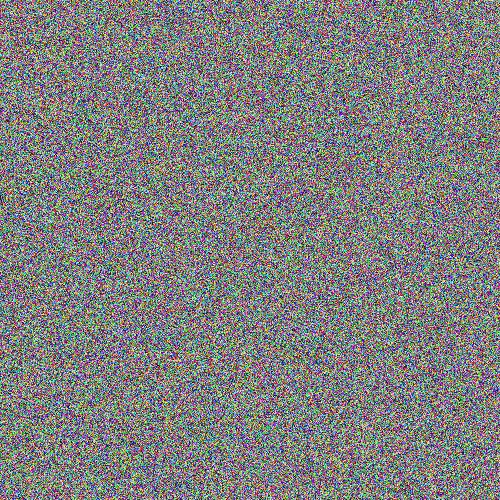

In [37]:
img_noise = np.random.uniform(size=(500,500,3))*255.0

imgN = img_noise
imgN = np.float32(imgN)
#img0 = np.float32(img0)
showarray(imgN/255.0)

In [38]:


sock = connect_socket()
n_times = 4
for i in range(n_times):
    
    #image = "img_109.jpg"
    #myfile = open(image, 'rb')
    
    img01 = np.uint8(np.clip(imgN/255.0,0,1)*255)
    img01 = PIL.Image.fromarray(img01)
    
    print("time: "+ str(i))
    img_r = send_image(sock, img01)
    img_r.show()
    #myfile.close()
    time.sleep(3)

    

connected 
time: 0
b'SIZE153600'
answer:
GOT SIZE
ok got size
bytes sent??
total data count:
35
sent-done 
time: 1
b'SIZE153600'
answer:
GOT SIZE
ok got size
bytes sent??
total data count:
35
sent-done 
time: 2
b'SIZE153600'
answer:
GOT SIZE
ok got size
bytes sent??
total data count:
35
sent-done 
time: 3
b'SIZE153600'
answer:
GOT SIZE
ok got size
bytes sent??
total data count:
35
sent-done 
